## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import csv

# Set path to data files
mouse_metadata_path = os.path.join('data', 'Mouse_metadata.csv')
study_results_path = os.path.join('data', 'Study_results.csv')

# Read the data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
CompleteDF = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')
CompleteDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice.
numberMice = len(CompleteDF["Mouse ID"].unique())
numberMice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateData = CompleteDF[CompleteDF.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicateID = duplicateData["Mouse ID"].unique()
duplicateID

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = CompleteDF[(CompleteDF['Mouse ID'] != 'g989')]
cleanDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
RegimentDF = cleanDF.groupby("Drug Regimen")
Regiment = RegimentDF.count().index
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
volMean = RegimentDF["Tumor Volume (mm3)"].mean()
volMedian = RegimentDF["Tumor Volume (mm3)"].median()
volVariance = RegimentDF["Tumor Volume (mm3)"].var()
volStdDev = RegimentDF["Tumor Volume (mm3)"].std()
volSEM = RegimentDF["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

regSummary = pd.DataFrame({"Drug Regiment": Regiment, "Mean Volume": volMean, "Median Volume": volMedian, 
                                "Variance Volume": volVariance, "Standard Deviation": volStdDev, 
                                "SEM": volSEM})
# Preview DataFrame
regSummary = regSummary.reset_index(drop=True)
regSummary

,Drug Regiment,Mean Volume,Median Volume,Variance Volume,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regAggSummaryDF = pd.DataFrame(cleanDF.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}))
regAggSummaryDF

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

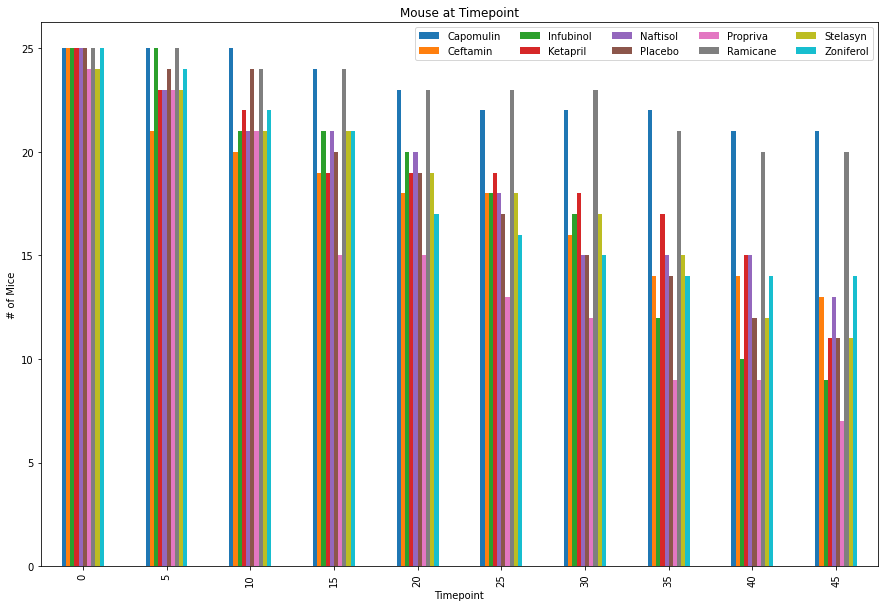

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regTime = cleanDF.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].nunique()
regTimeDF = pd.DataFrame(regTime)
regTimeDF.rename(index={0: "Timepoint", 1: "Drug Regimen", 2: "Mice"})
regTimeDFBAR = regTimeDF.unstack()
regTimeDFBAR.columns = regTimeDFBAR.columns.droplevel()
multi_plot = regTimeDFBAR.plot(kind="bar", figsize=(15, 10))

multi_plot.set_title("Mice at Timepoint")
multi_plot.set_xlabel('Timepoint')
multi_plot.set_ylabel('# of Mice')
multi_plot.legend(ncol=5)


In [ ]:
# plot the mouse counts for each drug using pandas


In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin


# isolated view of just capomulin for later use


# Reset index so drug regimen column persists after inner merge


# get mouse count per drug


# Start by getting the last (greatest) timepoint for each mouse


In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# show all rows of data


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
 

In [ ]:
# Determine outliers using upper and lower bounds


In [ ]:
# add subset 


# tumor volumes for each Drug Regimen


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest




## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#change index to mouse ID 

#remove other mouse IDs so only s185 shows


#set the x-axis equal to the Timepoint and y-axis to Tumor Volume


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume


# establish x-axis value for the weight of the mice


# produce scatter plot of the data


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg


#print St. Pearson Correlation Coefficient

# establish linear regression values

# linear regression line 


# scatter plot of the data
